In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import sys
import numpy as np
import cmocean.cm as ocm

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data')
int_dir = os.path.join(proj_dir,'data','analysis','interim')
src_dir = os.path.join(proj_dir,'src')
fig_dir = os.path.join(proj_dir,'reports','devel','figures')

sys.path.append(src_dir)
%load_ext autoreload
%autoreload 1

tools_dir = os.path.join(proj_dir,'src','tools')
sys.path.append(tools_dir)

In [2]:
grd_path = os.path.join(data_dir,'analysis','interim','grd4_dV.nc')
grd4 = xr.open_dataset(grd_path)

grd_path = os.path.join(data_dir,'analysis','interim','grd10_dV.nc')
grd10 = xr.open_dataset(grd_path)

ini_path = os.path.join(data_dir,'analysis','raw','waom_frc','waom4_ini.nc')
ini_premixed_path = os.path.join(data_dir,'analysis','raw','waom_frc','waom4_ini_premixed.nc')
avg_path = os.path.join(data_dir,'analysis','raw','waom4','ocean_avg_0006.nc')
his_10_path = os.path.join(data_dir,'analysis','raw','waom10','ocean_his_0005.nc')

ini4 = xr.open_dataset(ini_path)
ini4premixed = xr.open_dataset(ini_premixed_path)
avg4 = xr.open_dataset(avg_path)
his10 = xr.open_dataset(his_10_path)

In [21]:
mask = (grd10.zice<0) & (grd10.mask_rho==1)
area10 = (grd10.dx[-1].where(mask)*grd10.dy[-1].where(mask)).sum()
mask = (grd4.zice<0) & (grd4.mask_rho==1)
area4 = (grd4.dx[-1].where(mask)*grd4.dy[-1].where(mask)).sum()

In [22]:
(area10-area4)/area10

<xarray.DataArray ()>
array(0.11339112)

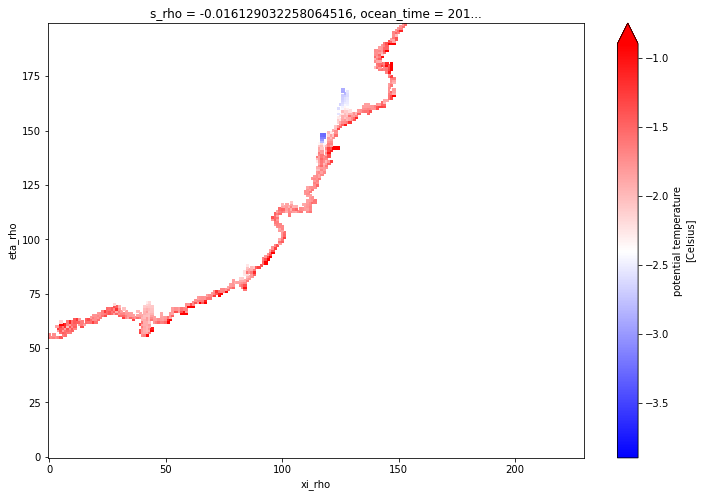

In [13]:
his10.temp[-1,-1].where(grd10.zice<0)[:200,400:].plot(size=8,vmin=-3.9,vmax=-0.9,cmap='bwr')

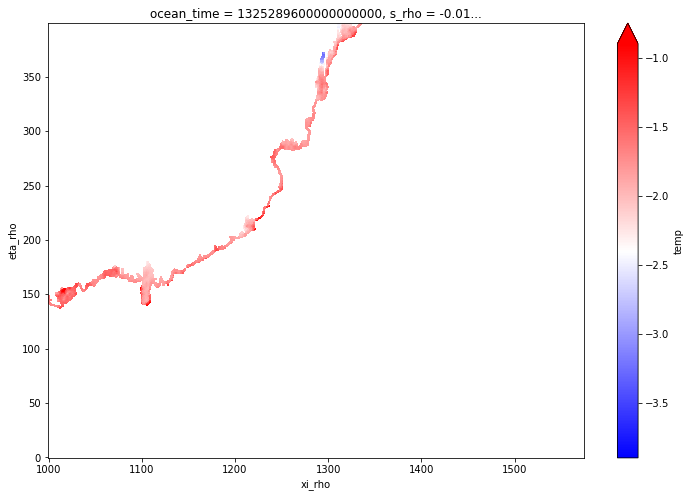

In [14]:
ini4.temp[-1,-1].where((grd4.zice<0) & (grd4.mask_rho==1))[:400,1000:].plot(size=8,vmin=-3.9,vmax=-0.9,cmap='bwr')

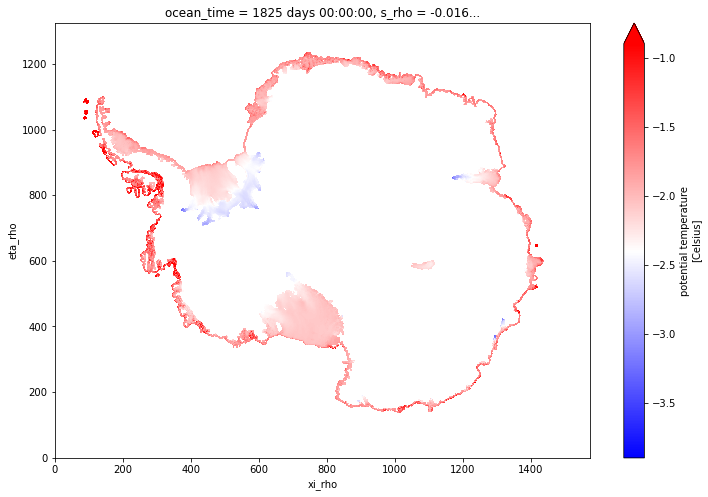

In [10]:
ini4premixed.temp[-1,-1].where((grd4.zice<0) & (grd4.mask_rho==1)).plot(size=8,vmin=-3.9,vmax=-0.9,cmap='bwr')

In [9]:
ini4.temp[-1,-1]

<xarray.DataArray 'temp' (eta_rho: 663, xi_rho: 788)>
[522444 values with dtype=float64]
Coordinates:
    ocean_time  int64 1325289600000000000
    s_rho       float64 -0.01613
  * eta_rho     (eta_rho) int64 0 2 4 6 8 10 ... 1314 1316 1318 1320 1322 1324
  * xi_rho      (xi_rho) int64 0 2 4 6 8 10 12 ... 1564 1566 1568 1570 1572 1574

In [8]:
ini4.temp[-1,-1,::2,::2].where((grd10.zice<0) & (grd10.mask_rho==1)).plot(size=8,vmin=-3.9,vmax=-0.9,cmap='bwr')

ValueError: arguments without labels along dimension 'eta_rho' cannot be aligned because they have different dimension size(s) {530} than the size of the aligned dimension labels: 663

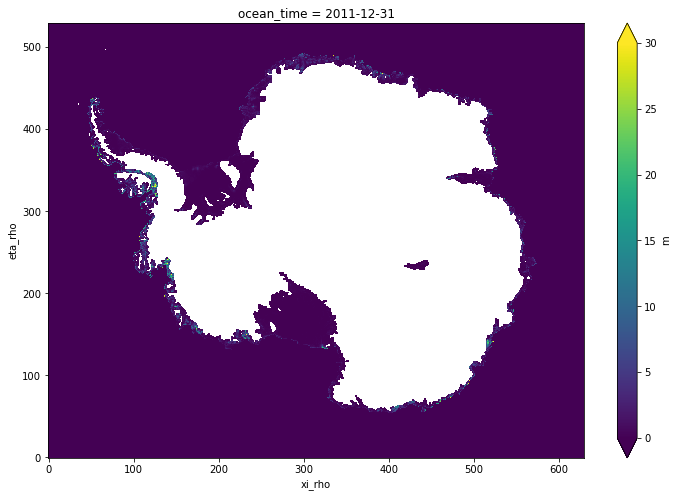

In [14]:
s2a = 365.25*24*3600
(his_10.m[-1]*s2a).plot(size=8,vmin=0,vmax=30)

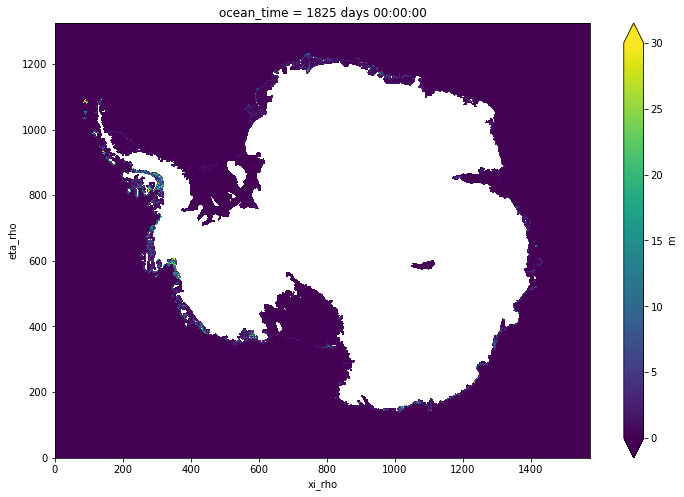

In [13]:
(ini_4_premixed.m*s2a).plot(size=8,vmin=0,vmax=30)